### UCI-Human-Activity-Recognition
#### By Asher Ali Mirza
It classifies the type of movement amongst six categories:

- WALKING,
- WALKING_UPSTAIRS,
- WALKING_DOWNSTAIRS,
- SITTING,
- STANDING,
- LAYING.

## Models Trained

- Random Forest

An updated dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones


In [1]:
!apt-get install -qq graphviz
!pip install graphviz


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [29]:
from numpy import mean
from numpy import std
import seaborn as sns
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from keras.layers import Permute, Reshape
from sklearn import metrics
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.tree import export_graphviz
import graphviz
import pydot
from IPython.display import Image
import matplotlib.pyplot as plt


In [3]:
features=list()
with open('Dataset/features.txt') as feat:
    features=[l.split()[1] for l in feat.readlines()]
print("Number of features = {}".format(len(features)))

Number of features = 561


In [4]:
train = pd.read_csv('Dataset/train/X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
train.columns = features
train['subject'] = pd.read_csv('Dataset/train/subject_train.txt', header=None)
train['Activity'] = pd.read_csv('Dataset/train/y_train.txt', names=['Activity'])
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4236,0.27525,-0.016269,-0.100948,-0.997104,-0.987233,-0.990756,-0.997345,-0.986986,-0.991358,-0.94259,...,-0.050458,-0.005674,0.61897,0.181798,-0.616285,-0.117924,-0.14244,21,4,SITTING


In [5]:
train.shape

(7352, 564)

In [6]:
test = pd.read_csv('Dataset/test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
test.columns = features
test['subject'] = pd.read_csv('Dataset/test/subject_test.txt', header=None)
test['Activity'] = pd.read_csv('Dataset/test/y_test.txt', names=['Activity'])
test['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2137,0.330303,-0.042161,-0.092232,-0.380228,-0.299041,-0.324011,-0.407035,-0.289453,-0.333775,-0.113594,...,-0.479067,-0.174391,0.661789,-0.086233,-0.669018,0.264855,0.178048,18,1,LAYING


In [7]:
test.shape

(2947, 564)

In [8]:
print('Duplicates in train = {}'.format(sum(train.duplicated())))
print('Duplicates in test = {}'.format(sum(test.duplicated())))
print('Invalid values in train = {}'.format(train.isnull().values.sum()))
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 0
Duplicates in test = 0
Invalid values in train = 0
Invalid values in test = 0


## Exploratory Data Analysis

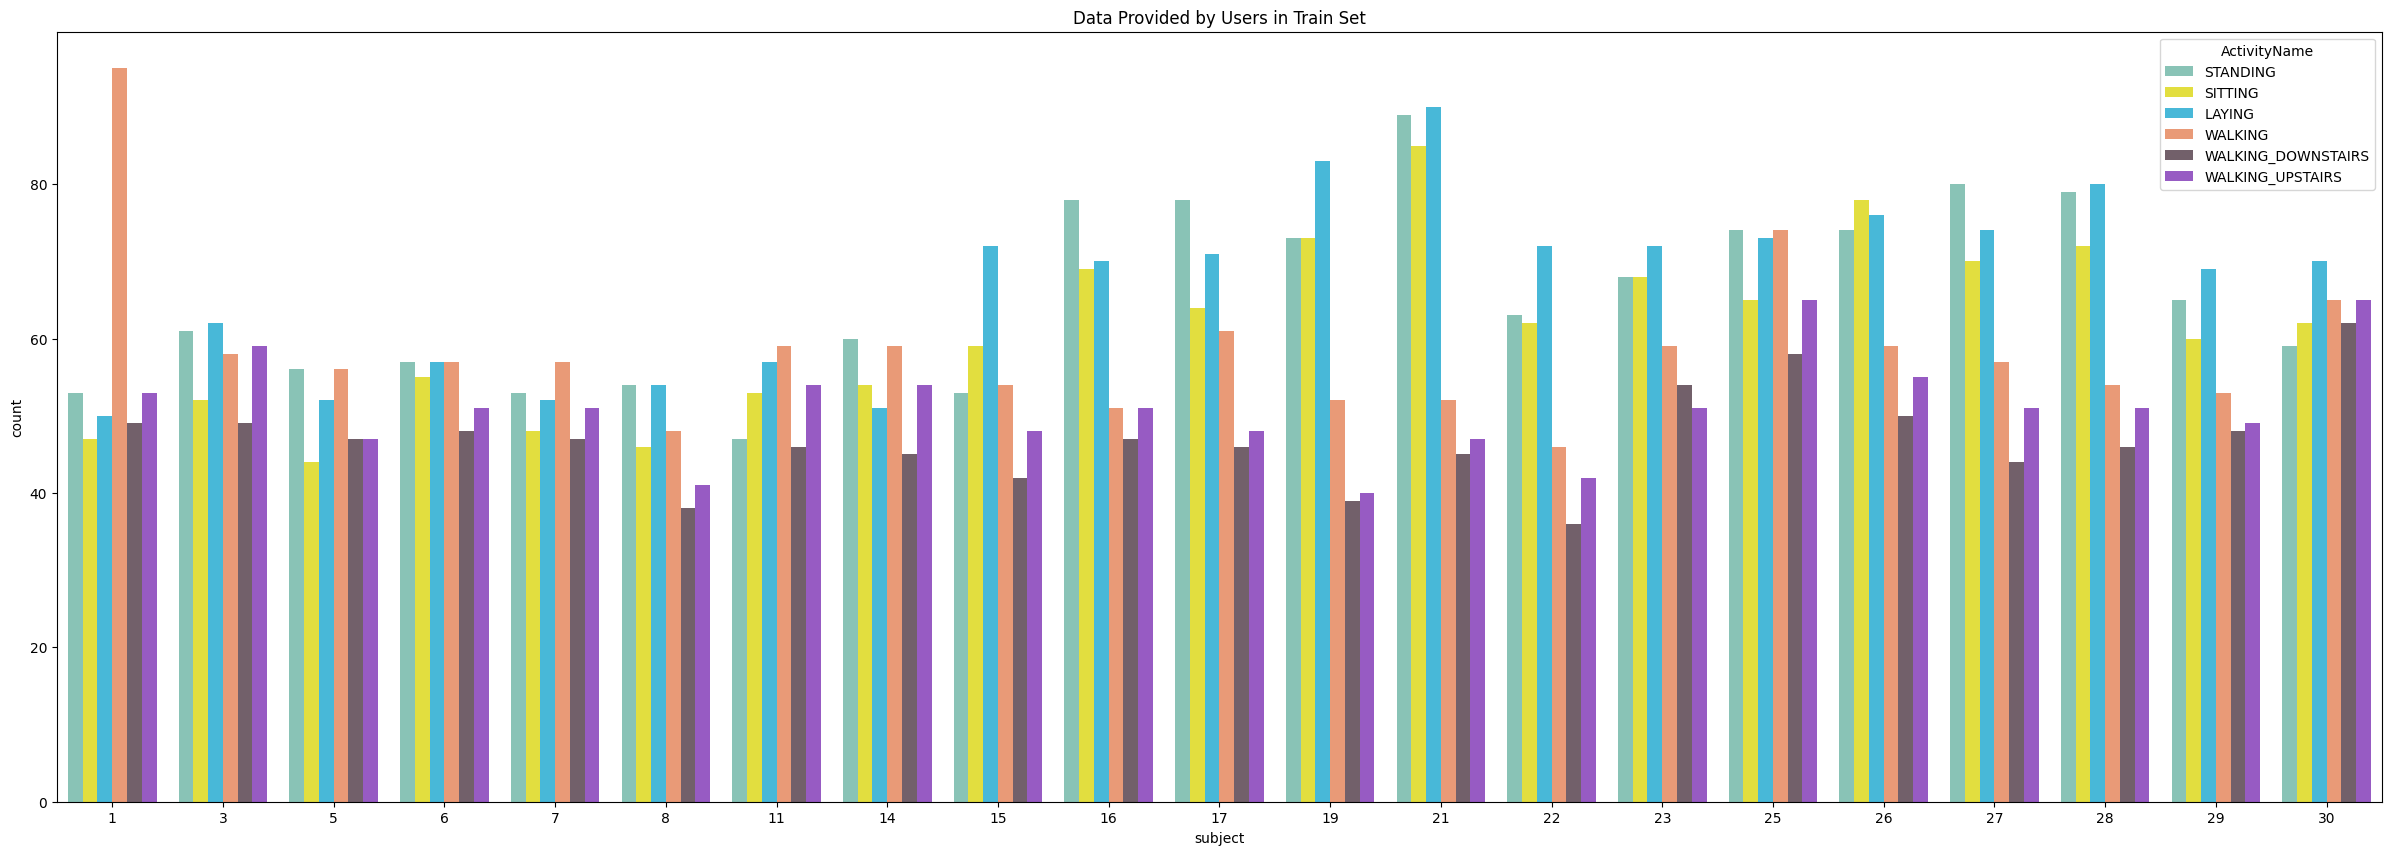

In [9]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = train)
pyplot.title('Data Provided by Users in Train Set')
pyplot.show()

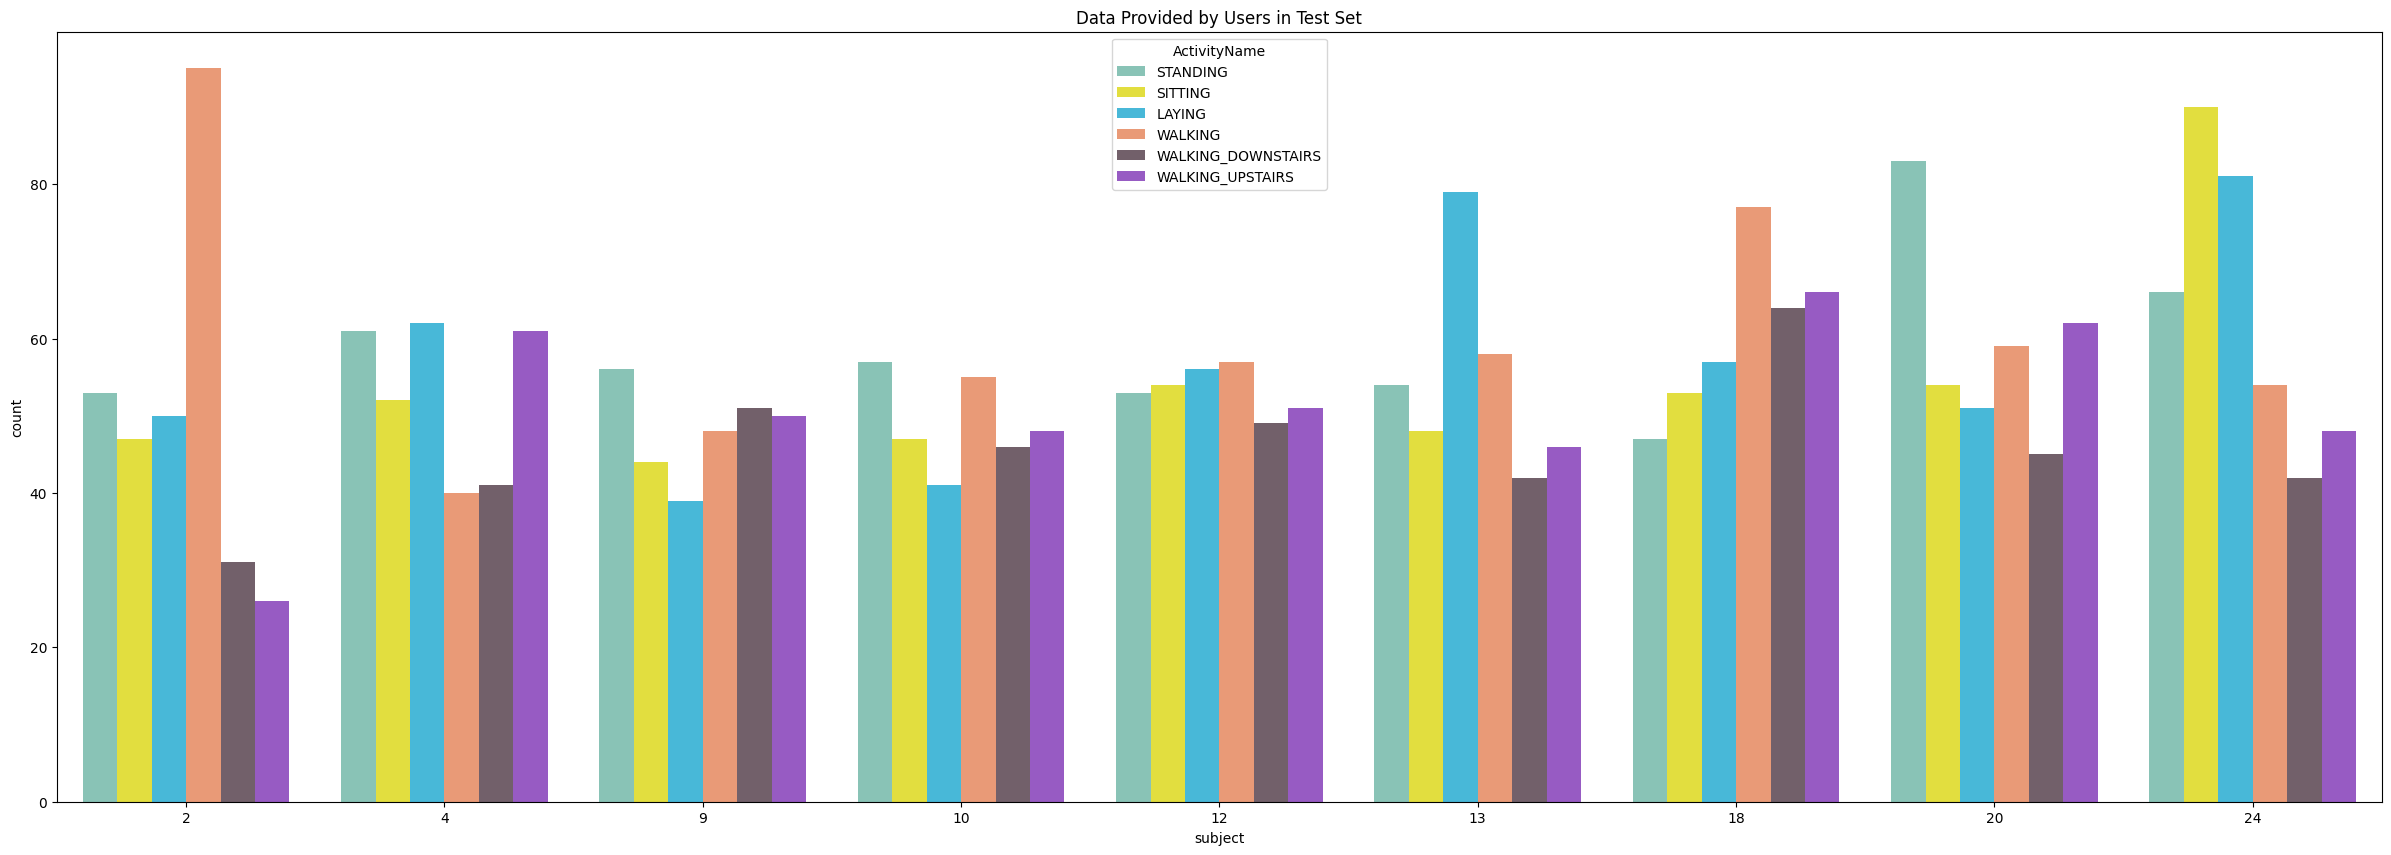

In [10]:
pyplot.figure(figsize=(30,10))
sns.countplot(x='subject',hue='ActivityName',palette= ["#7fcdbb","#fdf824","#30c6f0","#fc9264","#755d6b","#9a4ad4"], data = test)
pyplot.title('Data Provided by Users in Test Set')
pyplot.show()

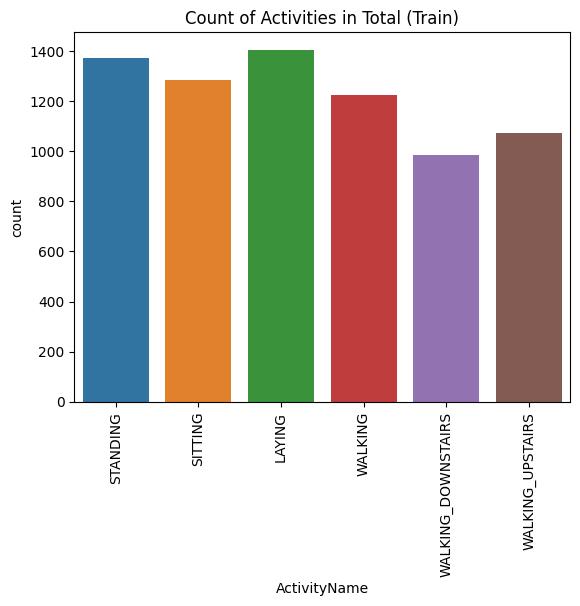

In [11]:
pyplot.title('Count of Activities in Total (Train)')
sns.countplot(x="ActivityName",data=train)
pyplot.xticks(rotation=90)
pyplot.show()

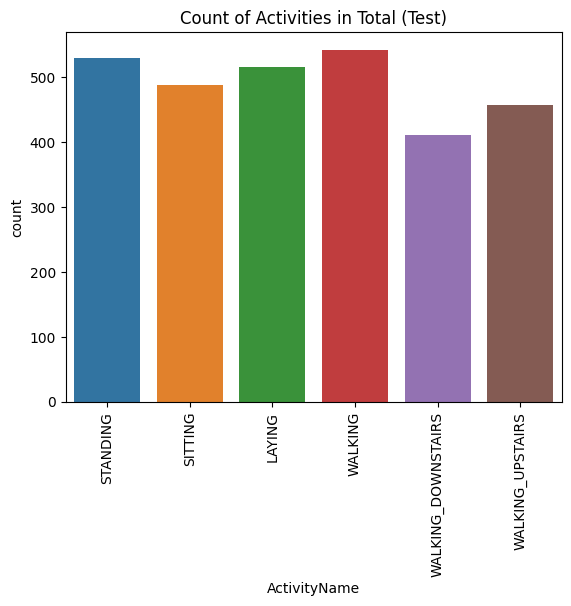

In [12]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",data=test)
pyplot.xticks(rotation=90)
pyplot.show()

In [13]:
def file_load(filepath):
    df = read_csv(filepath, header=None, delim_whitespace=True)
    return df.values 

In [14]:
def train_test_append(filenames, append_before=''):
    datalist = list()
    for name in filenames:
        data = file_load(append_before + name)
        datalist.append(data)
    datalist = dstack(datalist)
    return datalist

In [15]:
def inertial_signals_load(group, append_before=''):
    filepath = append_before + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = train_test_append(filenames, filepath)
    y = file_load(append_before + group + '/y_'+group+'.txt')
    return X, y

In [16]:
def load_dataset(append_before=''):
    trainX, trainy = inertial_signals_load('train', append_before + 'Dataset/')
    testX, testy = inertial_signals_load('test', append_before + 'Dataset/')
    trainy = trainy - 1
    testy = testy - 1
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [17]:
trainX, trainy, testX, testy = load_dataset()
verbose, epochs, batch_size = 0, 400, 150
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 4
n_length = 32
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features)) 
print(trainX.shape,testX.shape)

(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
(7352, 4, 32, 9) (2947, 4, 32, 9)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [19]:

def extract_features(data, window_size=32, step_size=16):
    features = []
    labels = []
    for start in range(0, len(data) - window_size, step_size):
        end = start + window_size
        window = data[start:end]
        # Extract features (mean, std, min, max for each feature in the window)
        mean_features = np.mean(window, axis=0)
        std_features = np.std(window, axis=0)
        min_features = np.min(window, axis=0)
        max_features = np.max(window, axis=0)
        feature_vector = np.concatenate([mean_features, std_features, min_features, max_features])
        features.append(feature_vector)
        # Assume the label for the window is the label of the last time step
        labels.append(data[end-1, -1]) 
    return np.array(features), np.array(labels)

# Example usage:
train_features, train_labels = extract_features(trainX)
test_features, test_labels = extract_features(testX)

In [20]:
## Flatten the features for Random Forest
n_samples, n_steps, n_length, n_features = trainX.shape
trainX_flattened = trainX.reshape((n_samples, n_steps * n_length * n_features))

n_samples, n_steps, n_length, n_features = testX.shape
testX_flattened = testX.reshape((n_samples, n_steps * n_length * n_features))

# Normalize the data
scaler = StandardScaler()
trainX_flattened = scaler.fit_transform(trainX_flattened)
testX_flattened = scaler.transform(testX_flattened)

# Flatten the labels for the Random Forest model
train_labels = np.argmax(trainy, axis=1)
test_labels = np.argmax(testy, axis=1)

# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(trainX_flattened, train_labels, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [21]:
# Evaluate the model
val_predictions = rf_model.predict(X_val)
test_predictions = rf_model.predict(testX_flattened)

Random Forest Model Summary
Number of Trees: 500
Max Depth of Trees: None
Features Considered at Each Split: sqrt
Out-of-Bag Score: 0.9617412004761096
Cross-Validation Mean Accuracy: 0.96
Cross-Validation Std Dev: 0.01
Validation Accuracy: 0.96
Test Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


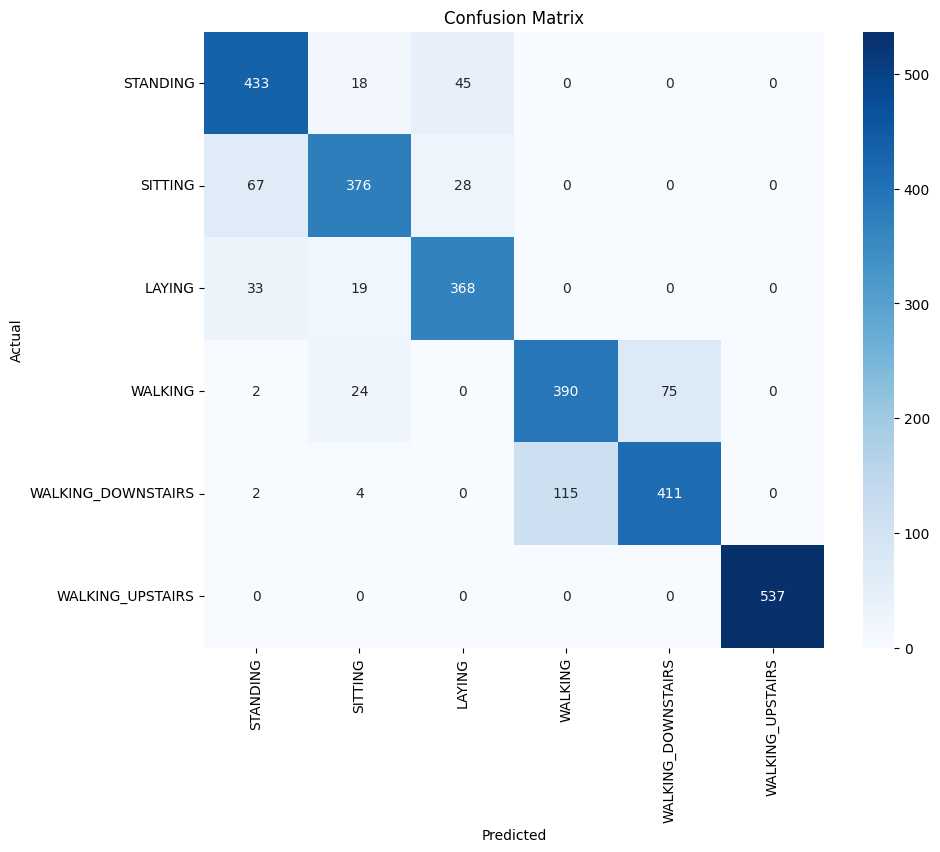

                    precision    recall  f1-score   support

          STANDING       0.81      0.87      0.84       496
           SITTING       0.85      0.80      0.82       471
            LAYING       0.83      0.88      0.85       420
           WALKING       0.77      0.79      0.78       491
WALKING_DOWNSTAIRS       0.85      0.77      0.81       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.85      0.85      0.85      2947

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       247
           1       0.90      0.99      0.95       200
           2       0.99      0.98      0.99       206
           3       0.94      0.95      0.95       262
           4       0.95      0.94      0.95       276
           5       1.00      1.00    

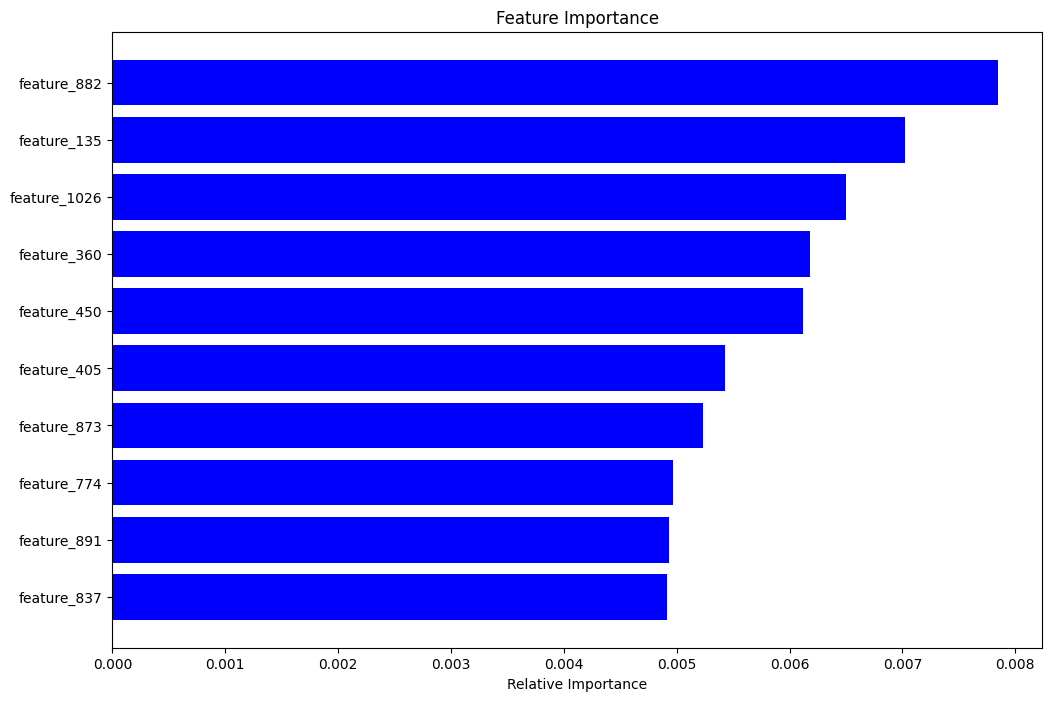

d:\SystemInstalls\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


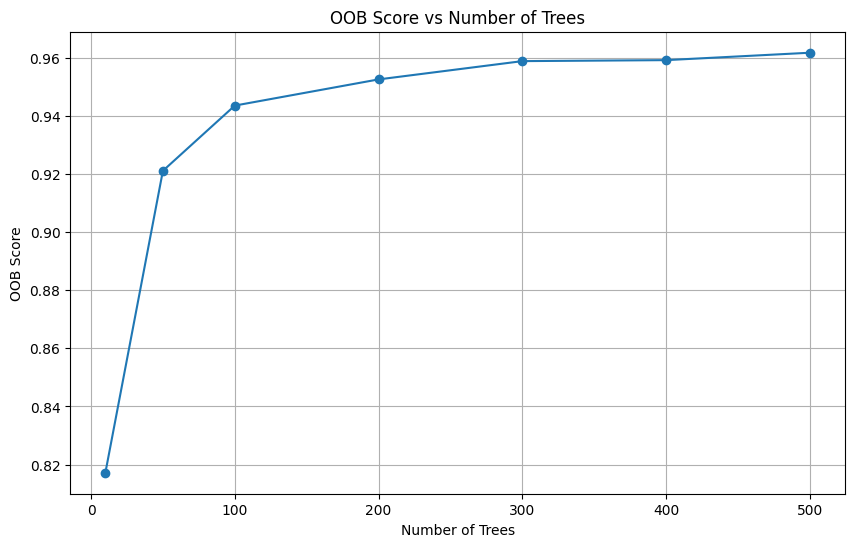

In [28]:
from sklearn.metrics import accuracy_score

# Evaluate the model
val_predictions = rf_model.predict(X_val)
test_predictions = rf_model.predict(testX_flattened)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Print model summary
print("Random Forest Model Summary")
print("============================")
print(f"Number of Trees: {rf_model.n_estimators}")
print(f"Max Depth of Trees: {rf_model.max_depth}")
print(f"Features Considered at Each Split: {rf_model.max_features}")
print(f"Out-of-Bag Score: {rf_model.oob_score_}")
print(f"Cross-Validation Mean Accuracy: {cv_mean:.2f}")
print(f"Cross-Validation Std Dev: {cv_std:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
pyplot.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train['ActivityName'].unique(), yticklabels=train['ActivityName'].unique())
pyplot.ylabel('Actual')
pyplot.xlabel('Predicted')
pyplot.title('Confusion Matrix')
pyplot.show()


# Classification Report
report = classification_report(test_labels, test_predictions, target_names=train['ActivityName'].unique())
print(report)


# Print classification reports
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))
print("Test Classification Report:\n", classification_report(test_labels, test_predictions))
print("OOB Score:\n", rf_model.oob_score_)

# Generate feature names for the flattened array
n_features_flat = n_steps * n_length * len(features)
flattened_features = [f'feature_{i}' for i in range(n_features_flat)]

# Adjust the number of feature names to match the actual number of features in the model
flattened_features = flattened_features[:trainX_flattened.shape[1]]


# Plot feature importance
feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[-10:]  # Top 10 features
pyplot.figure(figsize=(12, 8))
pyplot.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
pyplot.yticks(range(len(indices)), [flattened_features[i] for i in indices])
pyplot.xlabel('Relative Importance')
pyplot.title('Feature Importance')
pyplot.show()


# Plotting Learning Curves (Accuracy over Number of Trees)
# Number of trees in random forest
n_estimators = [10, 50, 100, 200, 300, 400, 500]
oob_scores = []

for n in n_estimators:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=True)
    rf_model.fit(X_train, y_train)
    oob_scores.append(rf_model.oob_score_)

pyplot.figure(figsize=(10, 6))
pyplot.plot(n_estimators, oob_scores, marker='o')
pyplot.title('OOB Score vs Number of Trees')
pyplot.xlabel('Number of Trees')
pyplot.ylabel('OOB Score')
pyplot.grid()
pyplot.show()


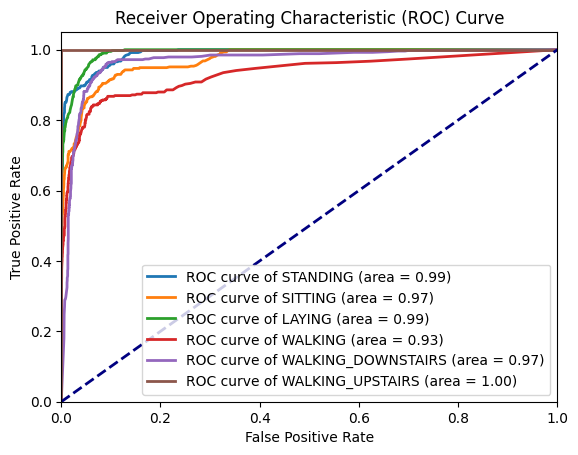

In [45]:
from sklearn.metrics import roc_curve, auc

# Plotting ROC Curve
y_prob = rf_model.predict_proba(testX_flattened)  # Use the best model's predictions
fpr = dict()
tpr = dict()
roc_auc = dict()
actions = train['ActivityName'].unique()  # Get the action names

for i in range(len(actions)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(actions)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of {actions[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
import joblib
# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


Model loaded from 'random_forest_model.pkl'
Model Evaluation on Subset of Unseen Data
Unseen Data Accuracy: 0.94
Unseen Data Precision: 0.94
Unseen Data Recall: 0.94
Unseen Data F1 Score: 0.94


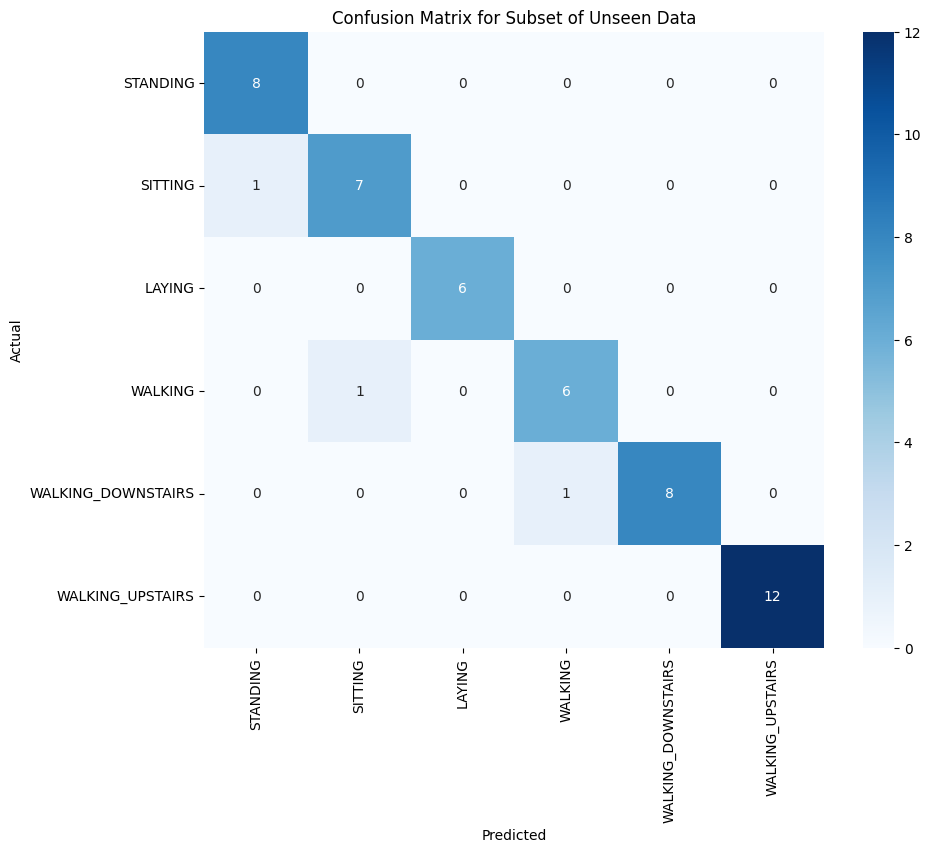

                    precision    recall  f1-score   support

          STANDING       0.89      1.00      0.94         8
           SITTING       0.88      0.88      0.88         8
            LAYING       1.00      1.00      1.00         6
           WALKING       0.86      0.86      0.86         7
WALKING_DOWNSTAIRS       1.00      0.89      0.94         9
  WALKING_UPSTAIRS       1.00      1.00      1.00        12

          accuracy                           0.94        50
         macro avg       0.94      0.94      0.94        50
      weighted avg       0.94      0.94      0.94        50

Actual vs Predicted Actions for Subset of Unseen Data
         Actual Action    Predicted Action
0              WALKING             WALKING
1               LAYING              LAYING
2              WALKING             WALKING
3             STANDING            STANDING
4   WALKING_DOWNSTAIRS  WALKING_DOWNSTAIRS
5              SITTING             SITTING
6   WALKING_DOWNSTAIRS             WALKING

In [40]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
loaded_rf_model = joblib.load('random_forest_model.pkl')
print("Model loaded from 'random_forest_model.pkl'")


unseen_data = testX_flattened
unseen_labels = test_labels


# Select a random subset of the unseen data
np.random.seed(10)  # For reproducibility
subset_indices = np.random.choice(len(unseen_data), size=50, replace=False)  # Adjust size as needed
subset_unseen_data = unseen_data[subset_indices]
subset_unseen_labels = unseen_labels[subset_indices]

# Make predictions on the subset of unseen data
subset_unseen_predictions = loaded_rf_model.predict(subset_unseen_data)

# Calculate accuracy
subset_unseen_accuracy = accuracy_score(subset_unseen_labels, subset_unseen_predictions)

# Calculate precision, recall, and F1-score
subset_unseen_precision = precision_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')
subset_unseen_recall = recall_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')
subset_unseen_f1 = f1_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')

# Print model evaluation on the subset of unseen data
print("Model Evaluation on Subset of Unseen Data")
print("=========================================")
print(f"Unseen Data Accuracy: {subset_unseen_accuracy:.2f}")
print(f"Unseen Data Precision: {subset_unseen_precision:.2f}")
print(f"Unseen Data Recall: {subset_unseen_recall:.2f}")
print(f"Unseen Data F1 Score: {subset_unseen_f1:.2f}")

# Confusion Matrix for unseen data subset
subset_unseen_conf_matrix = confusion_matrix(subset_unseen_labels, subset_unseen_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(subset_unseen_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train['ActivityName'].unique(), yticklabels=train['ActivityName'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Subset of Unseen Data')
plt.show()

# Classification Report for unseen data subset
subset_unseen_report = classification_report(subset_unseen_labels, subset_unseen_predictions, target_names=train['ActivityName'].unique())
print(subset_unseen_report)

# Display actual vs predicted actions for the subset
actions = train['ActivityName'].unique()
actual_actions = [actions[label] for label in subset_unseen_labels]
predicted_actions = [actions[label] for label in subset_unseen_predictions]

results_df = pd.DataFrame({
    'Actual Action': actual_actions,
    'Predicted Action': predicted_actions
})

print("Actual vs Predicted Actions for Subset of Unseen Data")
print(results_df)

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a base model
rf = RandomForestClassifier(random_state=42, oob_score=True)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
test_predictions = best_rf.predict(testX_flattened)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy of Best Model: {:.2f}%".format(test_accuracy * 100))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best cross-validation score:  0.9563006086036794
Test Accuracy of Best Model: 85.00%


Final Model Evaluation
Validation Accuracy: 0.97
Test Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


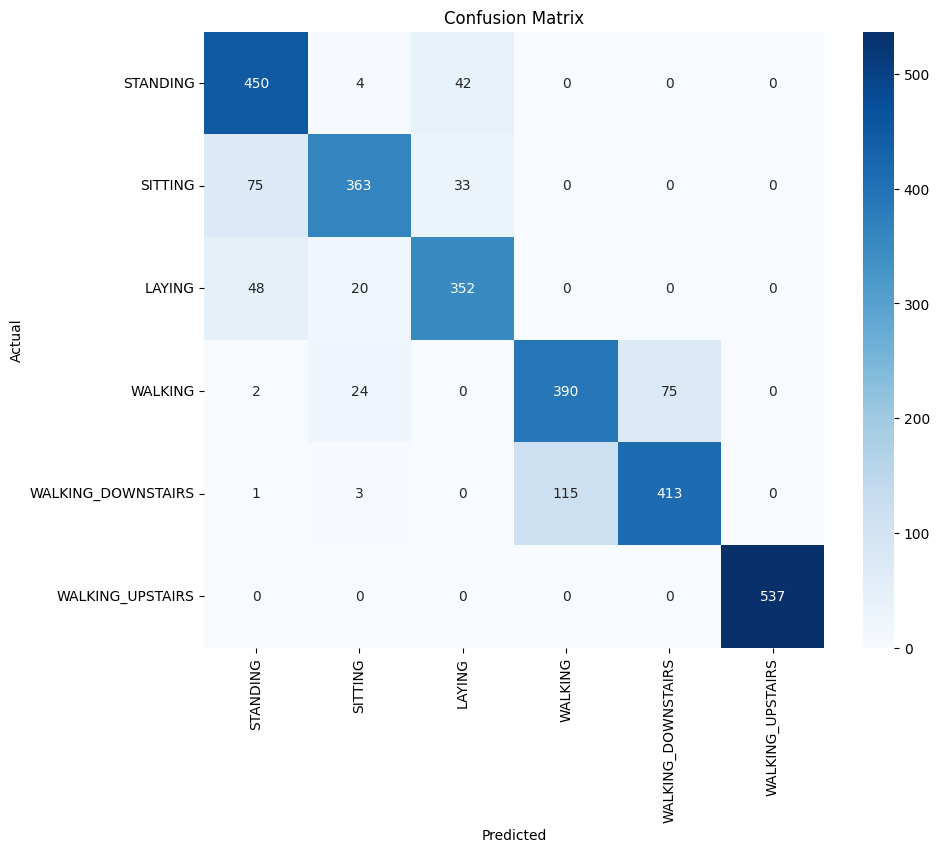

                    precision    recall  f1-score   support

          STANDING       0.78      0.91      0.84       496
           SITTING       0.88      0.77      0.82       471
            LAYING       0.82      0.84      0.83       420
           WALKING       0.77      0.79      0.78       491
WALKING_DOWNSTAIRS       0.85      0.78      0.81       532
  WALKING_UPSTAIRS       1.00      1.00      1.00       537

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.85      0.85      0.85      2947



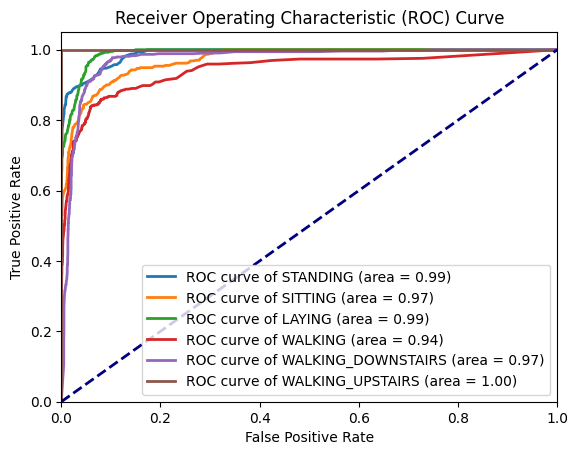

In [46]:
from sklearn.metrics import roc_curve, auc

# Best Random Forest model
best_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    oob_score=True
)
best_rf.fit(X_train, y_train)

# Predictions
val_predictions = best_rf.predict(X_val)
test_predictions = best_rf.predict(testX_flattened)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print final evaluation
print("Final Model Evaluation")
print("=========================")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train['ActivityName'].unique(), yticklabels=train['ActivityName'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(test_labels, test_predictions, target_names=train['ActivityName'].unique())
print(report)

# Plotting ROC Curve
y_prob = best_rf.predict_proba(testX_flattened)  # Use the best model's predictions
fpr = dict()
tpr = dict()
roc_auc = dict()
actions = train['ActivityName'].unique()  # Get the action names

for i in range(len(actions)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(actions)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of {actions[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Best model saved as 'best_random_forest_model.pkl'
Best model loaded from 'best_random_forest_model.pkl'
Model Evaluation on Subset of Unseen Data
Unseen Data Accuracy: 0.92
Unseen Data Precision: 0.92
Unseen Data Recall: 0.92
Unseen Data F1 Score: 0.92


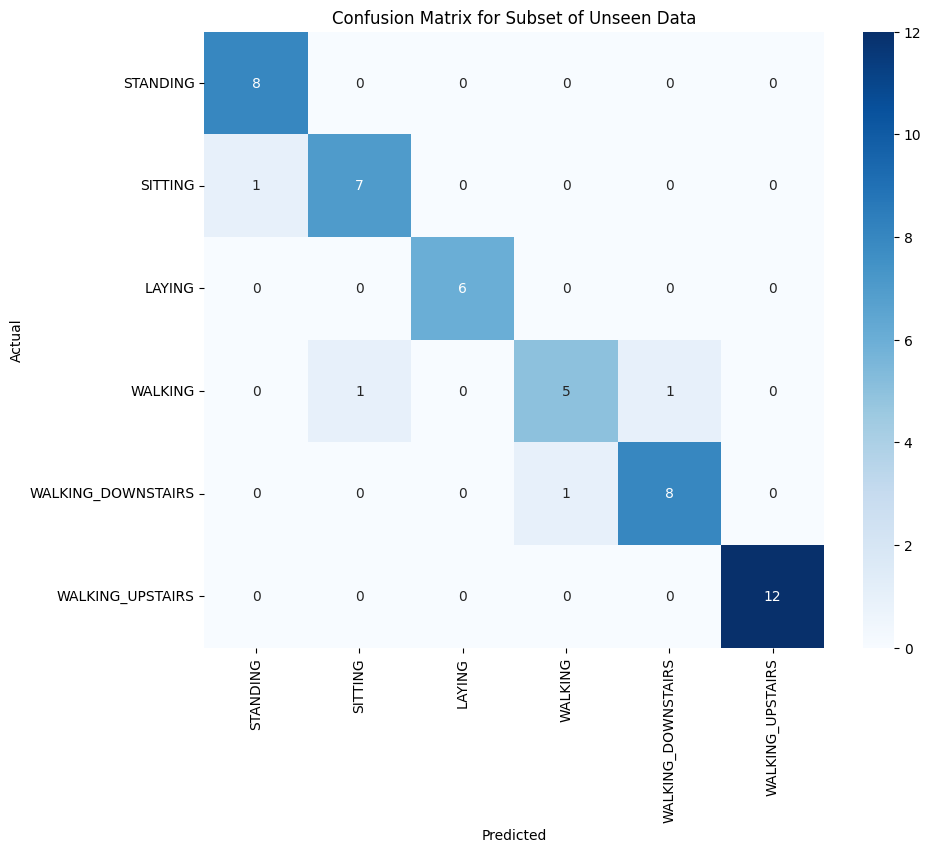

                    precision    recall  f1-score   support

          STANDING       0.89      1.00      0.94         8
           SITTING       0.88      0.88      0.88         8
            LAYING       1.00      1.00      1.00         6
           WALKING       0.83      0.71      0.77         7
WALKING_DOWNSTAIRS       0.89      0.89      0.89         9
  WALKING_UPSTAIRS       1.00      1.00      1.00        12

          accuracy                           0.92        50
         macro avg       0.91      0.91      0.91        50
      weighted avg       0.92      0.92      0.92        50

Actual vs Predicted Actions for Subset of Unseen Data
         Actual Action    Predicted Action
0              WALKING             WALKING
1               LAYING              LAYING
2              WALKING             WALKING
3             STANDING            STANDING
4   WALKING_DOWNSTAIRS  WALKING_DOWNSTAIRS
5              SITTING             SITTING
6   WALKING_DOWNSTAIRS             WALKING

In [44]:
# Save the best model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Best model saved as 'best_random_forest_model.pkl'")

# Load the best model
loaded_best_rf_model = joblib.load('best_random_forest_model.pkl')
print("Best model loaded from 'best_random_forest_model.pkl'")

# Assume unseen_data and unseen_labels are the new data and labels
# For demonstration, let's create some dummy unseen data similar to testX_flattened
# In practice, you should replace this with your actual unseen data
unseen_data = testX_flattened  # Replace with actual unseen data
unseen_labels = test_labels  # Replace with actual unseen labels

# Select a random subset of the unseen data
np.random.seed(10)  # For reproducibility
subset_indices = np.random.choice(len(unseen_data), size=50, replace=False)  # Adjust size as needed
subset_unseen_data = unseen_data[subset_indices]
subset_unseen_labels = unseen_labels[subset_indices]

# Make predictions on the subset of unseen data
subset_unseen_predictions = loaded_best_rf_model.predict(subset_unseen_data)

# Calculate accuracy
subset_unseen_accuracy = accuracy_score(subset_unseen_labels, subset_unseen_predictions)

# Calculate precision, recall, and F1-score
subset_unseen_precision = precision_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')
subset_unseen_recall = recall_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')
subset_unseen_f1 = f1_score(subset_unseen_labels, subset_unseen_predictions, average='weighted')

# Print model evaluation on the subset of unseen data
print("Model Evaluation on Subset of Unseen Data")
print("=========================================")
print(f"Unseen Data Accuracy: {subset_unseen_accuracy:.2f}")
print(f"Unseen Data Precision: {subset_unseen_precision:.2f}")
print(f"Unseen Data Recall: {subset_unseen_recall:.2f}")
print(f"Unseen Data F1 Score: {subset_unseen_f1:.2f}")

# Confusion Matrix for unseen data subset
subset_unseen_conf_matrix = confusion_matrix(subset_unseen_labels, subset_unseen_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(subset_unseen_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train['ActivityName'].unique(), yticklabels=train['ActivityName'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Subset of Unseen Data')
plt.show()

# Classification Report for unseen data subset
subset_unseen_report = classification_report(subset_unseen_labels, subset_unseen_predictions, target_names=train['ActivityName'].unique())
print(subset_unseen_report)

# Display actual vs predicted actions for the subset
actions = train['ActivityName'].unique()
actual_actions = [actions[label] for label in subset_unseen_labels]
predicted_actions = [actions[label] for label in subset_unseen_predictions]

results_df = pd.DataFrame({
    'Actual Action': actual_actions,
    'Predicted Action': predicted_actions
})

print("Actual vs Predicted Actions for Subset of Unseen Data")
print(results_df)